In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [193]:
df = pd.read_csv('nyc-rolling-sales.csv', encoding='utf-8')
df_old_size = df.shape[0]

In [194]:
df.isnull().any()

Unnamed: 0                        False
BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
EASE-MENT                         False
BUILDING CLASS AT PRESENT         False
ADDRESS                           False
APARTMENT NUMBER                  False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
dtype: bool

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [196]:
columns = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BUILDING CLASS AT TIME OF SALE']

for c in columns:
    df[c] = pd.factorize(df[c])[0]

df['SALE DATE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df = df.dropna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69987 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      69987 non-null  int64  
 1   BOROUGH                         69987 non-null  int64  
 2   NEIGHBORHOOD                    69987 non-null  int64  
 3   BUILDING CLASS CATEGORY         69987 non-null  int64  
 4   TAX CLASS AT PRESENT            69987 non-null  int64  
 5   BLOCK                           69987 non-null  int64  
 6   LOT                             69987 non-null  int64  
 7   EASE-MENT                       69987 non-null  int64  
 8   BUILDING CLASS AT PRESENT       69987 non-null  int64  
 9   ADDRESS                         69987 non-null  int64  
 10  APARTMENT NUMBER                69987 non-null  int64  
 11  ZIP CODE                        69987 non-null  int64  
 12  RESIDENTIAL UNITS               

array([[<Axes: title={'center': 'SALE PRICE'}>]], dtype=object)

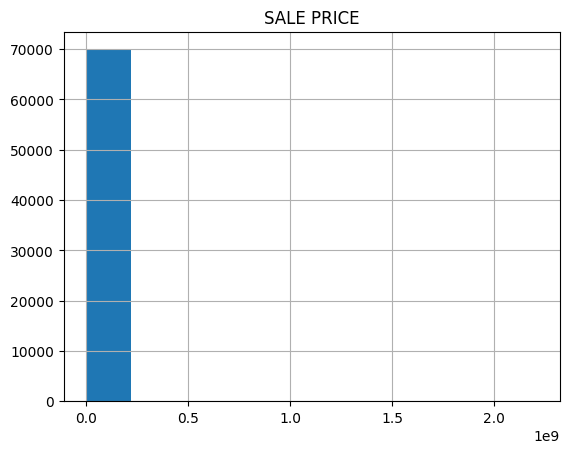

In [197]:
df.hist(['SALE PRICE'])

array([[<Axes: title={'center': 'SALE PRICE'}>]], dtype=object)

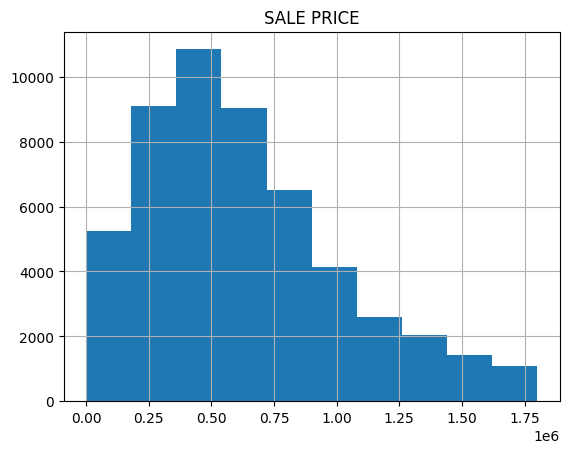

In [198]:
df = df[df['SALE PRICE'] < 1.8 * 10**6]
df = df[df['SALE PRICE'] != 0]
df.hist(['SALE PRICE'])

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52045 entries, 12 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      52045 non-null  int64  
 1   BOROUGH                         52045 non-null  int64  
 2   NEIGHBORHOOD                    52045 non-null  int64  
 3   BUILDING CLASS CATEGORY         52045 non-null  int64  
 4   TAX CLASS AT PRESENT            52045 non-null  int64  
 5   BLOCK                           52045 non-null  int64  
 6   LOT                             52045 non-null  int64  
 7   EASE-MENT                       52045 non-null  int64  
 8   BUILDING CLASS AT PRESENT       52045 non-null  int64  
 9   ADDRESS                         52045 non-null  int64  
 10  APARTMENT NUMBER                52045 non-null  int64  
 11  ZIP CODE                        52045 non-null  int64  
 12  RESIDENTIAL UNITS              

In [200]:
x = df.loc[:, df.columns != 'SALE PRICE']
y = df['SALE PRICE']
train_points, test_points, train_values, test_values = train_test_split(x, y, random_state=104, test_size=0.25, shuffle=False, stratify=None)

In [201]:
rf_model = ensemble.RandomForestRegressor(n_estimators=100)
rf_model.fit(train_points, train_values)
test_predict_rf = rf_model.predict(test_points)
print(mean_absolute_error(test_values, test_predict_rf))

24.41838226252719


In [203]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 13)
xg_reg.fit(train_points, train_values)
xgb_predict = xg_reg.predict(test_points)
print(mean_absolute_error(test_values, xgb_predict))

136589.34438823297
